**Введение**


Сахарный диабет — это заболевание, при котором уровень сахара в крови становится слишком высоким.

Инсулин необходим организму, чтобы клетки получали сахар и использовали его как источник энергии. Когда этот процесс нарушается, уровень сахара в крови повышается, что приводит к проблемам со здоровьем.


Центры по контролю и профилактике заболеваний указали, что по состоянию на 2018 год 34,2 миллиона американцев страдают диабетом, а 88 миллионов - преддиабетом. Кроме того, по оценкам CDC, 1 из 5 диабетиков и примерно 8 из 10 преддиабетиков не знают о своем риске.


Диабет также ложится огромным бременем на экономику: затраты на диагностирование диабета составляют примерно 327 миллиардов долларов, а общие затраты при недиагностированном диабете и преддиабете приближаются к 400 миллиардам долларов ежегодно.

**Данный датасет содержит следующие столбцы**

 Diabetes_binary  - таргет     
 1   HighBP - артериальное давление              
 2   HighChol - холестерин в крови            
 3   CholCheck - проверка уровня холестина в крови за последние 5 лет            
 4   BMI - индекс массы тела                  
 5   Smoker - курит или нет             
 6   Stroke - был инсульт или нет              
 7   HeartDiseaseorAttack - были ли сердечные заболевания или приступы  
 8   PhysActivity - занимается спортом или нет          
 9   Fruits - употребляете ли фрукты 1 или более раз в день               
 10  Veggies - употребляете ли овощи 1 или более раз в день                 
 11  HvyAlcoholConsump - употребляете ли вы алкоголь   
 12  AnyHealthcare - есть медицинское страхование или нет        
 13  NoDocbcCost - были бы случаи, когда вы не могли обратиться к врачу из-за дороговизны           
 14  GenHlth - оценка вашего здоровья от 1 до 5              
 15  MentHlth - сколько дней в месяц вы испытывали плохое психическое состояние( от 0 до 30)             
 16  PhysHlth - сколько дней в месяц вы испытывали плохое физическое состояние( от 0 до 30)                
 17  DiffWalk - тяжело ли вам ходить, подниматься по лестнице              
 18  Sex - пол                   
 19  Age - возраст                   
 20  Education - какой у вас уровень образования             
 21  Income - годовой доход семьи по шкале от 1 до 8                

**Импорт библиотек**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**Предварительная обработка данных**

1. Скачали датасет
2. Загрузили его в фрейм данных

In [ ]:
data = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0


3. Проверим, есть ли в данных пропущенные значения? - Нет

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

4. Смотрим статистическую информацию о данных

In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


5. Проверим названия фичей

In [ ]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

6. Проверим размерность датасета

In [ ]:
data.shape

(70692, 22)

7. Проверим распределение классов - идеальное

In [ ]:
data['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,35346
1.0,35346


**Разведочный анализ данных**

8. Построим корреляционную матрицу, на ее основе построим тепловую карту

Text(0.5, 1.0, 'Heatmap')

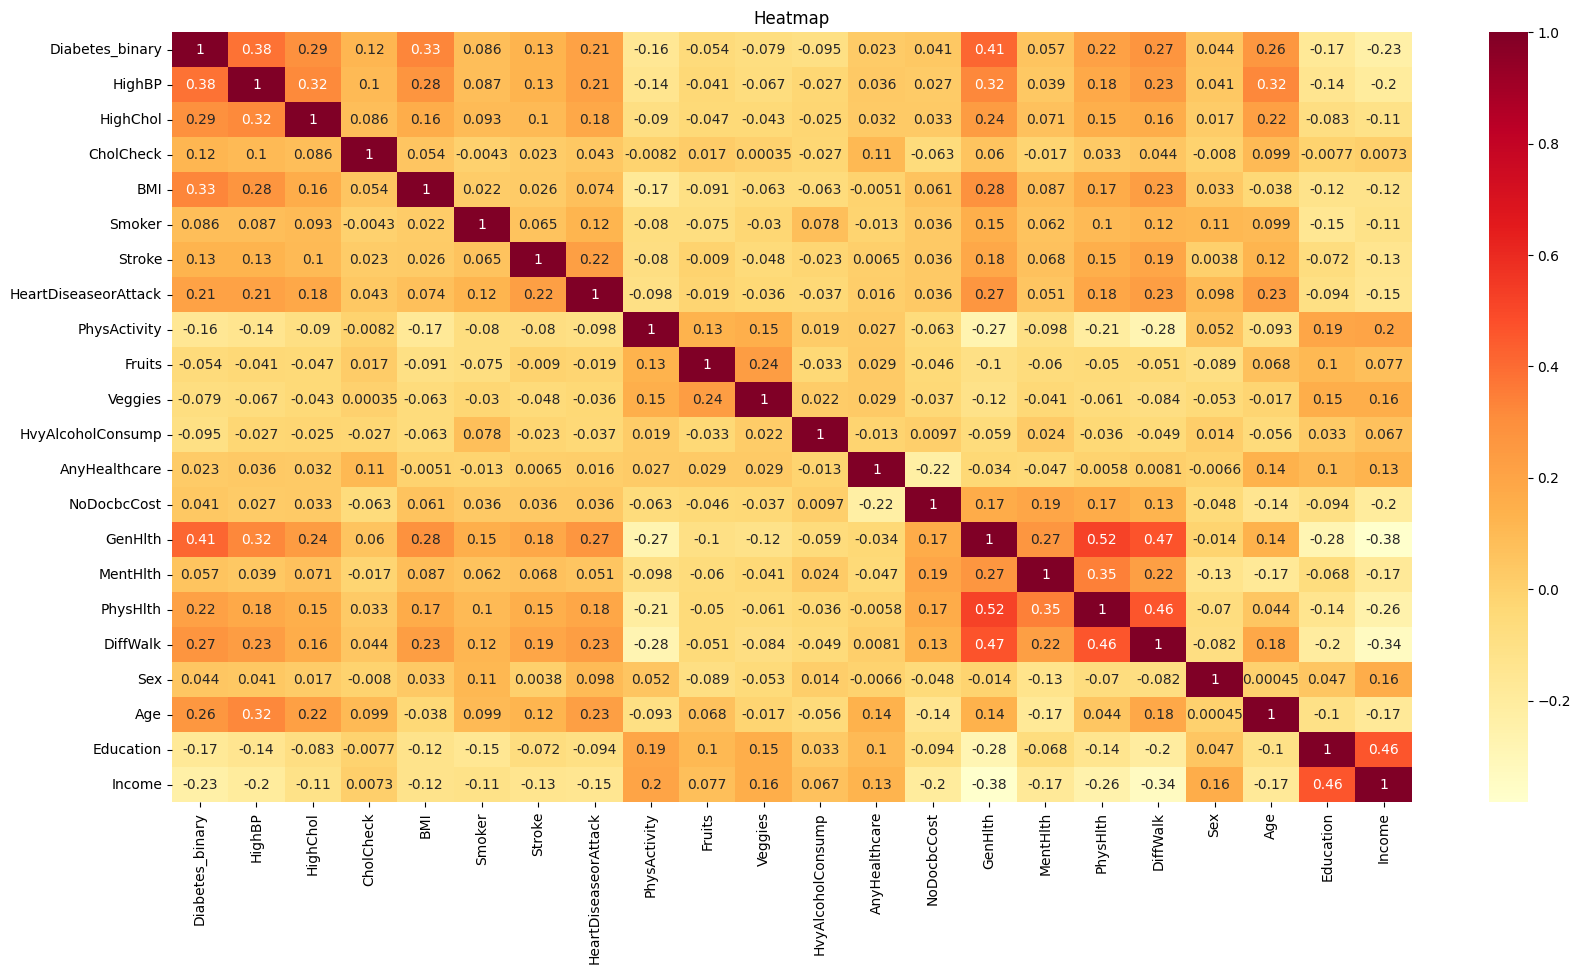

In [ ]:
plt.figure(figsize = (20,10))
corr_matrix = data.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True , cmap ='YlOrRd' )
plt.title("Heatmap")

In [ ]:
strong_corrs = corr_matrix[(corr_matrix.abs() > 0.465) & (corr_matrix != 1)]
strong_corr_pairs = strong_corrs.stack().index.tolist()
print("Наиболее сильные корреляции между признаками (положительные):")
for feature1, feature2 in strong_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_matrix.loc[feature1, feature2]}")

strong_corrs = corr_matrix[(corr_matrix < -0.3) & (corr_matrix != 1)]
strong_corr_pairs = strong_corrs.stack().index.tolist()
print("\nНаиболее сильные корреляции между признаками (отрицательные):")
for feature1, feature2 in strong_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_matrix.loc[feature1, feature2]}")

corr_with_target = corr_matrix['Diabetes_binary'].drop('Diabetes_binary')
sorted_corr_with_target = corr_with_target.abs().sort_values(ascending=False)
print("\nНаиболее сильные корреляции между таргетом и признаками:")
for feature, corr_value in list(sorted_corr_with_target.items())[:3]:
    print(f"{feature}: {corr_matrix.loc[feature, 'Diabetes_binary']}")


Наиболее сильные корреляции между признаками (положительные):
GenHlth - PhysHlth: 0.5242744791239562
GenHlth - DiffWalk: 0.4665398762627897
PhysHlth - GenHlth: 0.5242744791239562
DiffWalk - GenHlth: 0.4665398762627897

Наиболее сильные корреляции между признаками (отрицательные):
GenHlth - Income: -0.3823375495885094
DiffWalk - Income: -0.33642544406322217
Income - GenHlth: -0.3823375495885094
Income - DiffWalk: -0.33642544406322217

Наиболее сильные корреляции между таргетом и признаками:
GenHlth: 0.4142586575630089
HighBP: 0.3815155489073096
BMI: 0.3283556127093338


**Наиболее сильная положительная корреляция у данных пар фичей:**


GenHlth - PhysHlth: 0.5242744791239562

GenHlth - DiffWalk: 0.4665398762627897

**Наиболее сильная отрицательная корреляция у данных пар фичей:**


GenHlth - Income: -0.3823375495885094

DiffWalk - Income: -0.33642544406322217


**Наиболее сильная корреляция с таргетом у фичей:**

GenHlth

HighBP

BMI


9. Построим гистрограммы

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

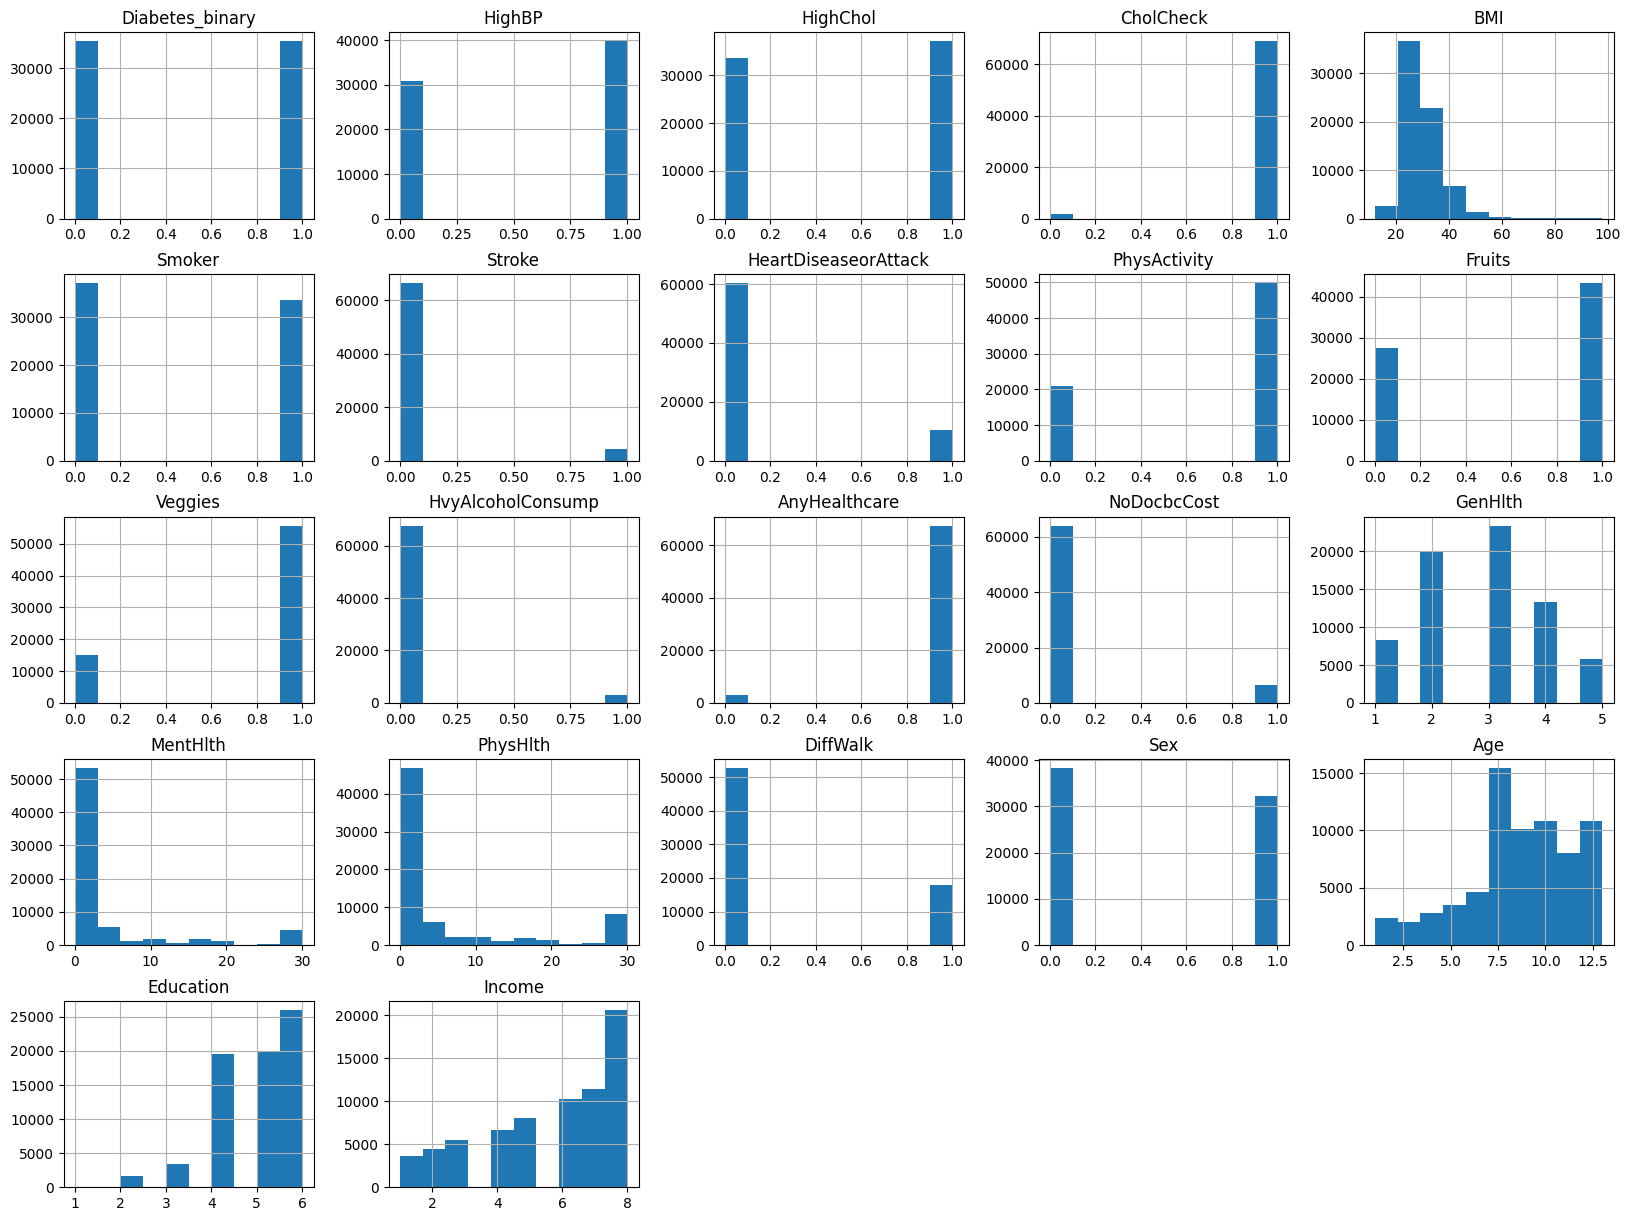

In [ ]:
data.hist(figsize=(20,15))

In [ ]:
import scipy.stats as stats
for col in data.columns[:-1]:
  print(col, stats.shapiro(data[col]))

Diabetes_binary ShapiroResult(statistic=0.6366224260750695, pvalue=1.935045727506944e-141)
HighBP ShapiroResult(statistic=0.6307424654727146, pvalue=6.219384256707285e-142)
HighChol ShapiroResult(statistic=0.6356614311673741, pvalue=1.6056227416636577e-141)
CholCheck ShapiroResult(statistic=0.13910956884100023, pvalue=3.6958770442485656e-169)
BMI ShapiroResult(statistic=0.8994835344464236, pvalue=8.561231464319347e-105)
Smoker ShapiroResult(statistic=0.6357330813248738, pvalue=1.6280949282298157e-141)
Stroke ShapiroResult(statistic=0.25727821590899824, pvalue=3.0948160301083957e-164)
HeartDiseaseorAttack ShapiroResult(statistic=0.42318075864977234, pvalue=5.606554452775773e-156)
PhysActivity ShapiroResult(statistic=0.5737081100670253, pvalue=2.209418210296378e-146)
Fruits ShapiroResult(statistic=0.6181959145262963, pvalue=5.819128217220532e-143)
Veggies ShapiroResult(statistic=0.5019478666672019, pvalue=2.7931259716782168e-151)
HvyAlcoholConsump ShapiroResult(statistic=0.20201688523758

10. Построим графики для просмотра зависимостей между таргетом и наиболее коррелирующими с ним фичами

Text(0.5, 1.0, 'Diabetes_binary vs BMI')

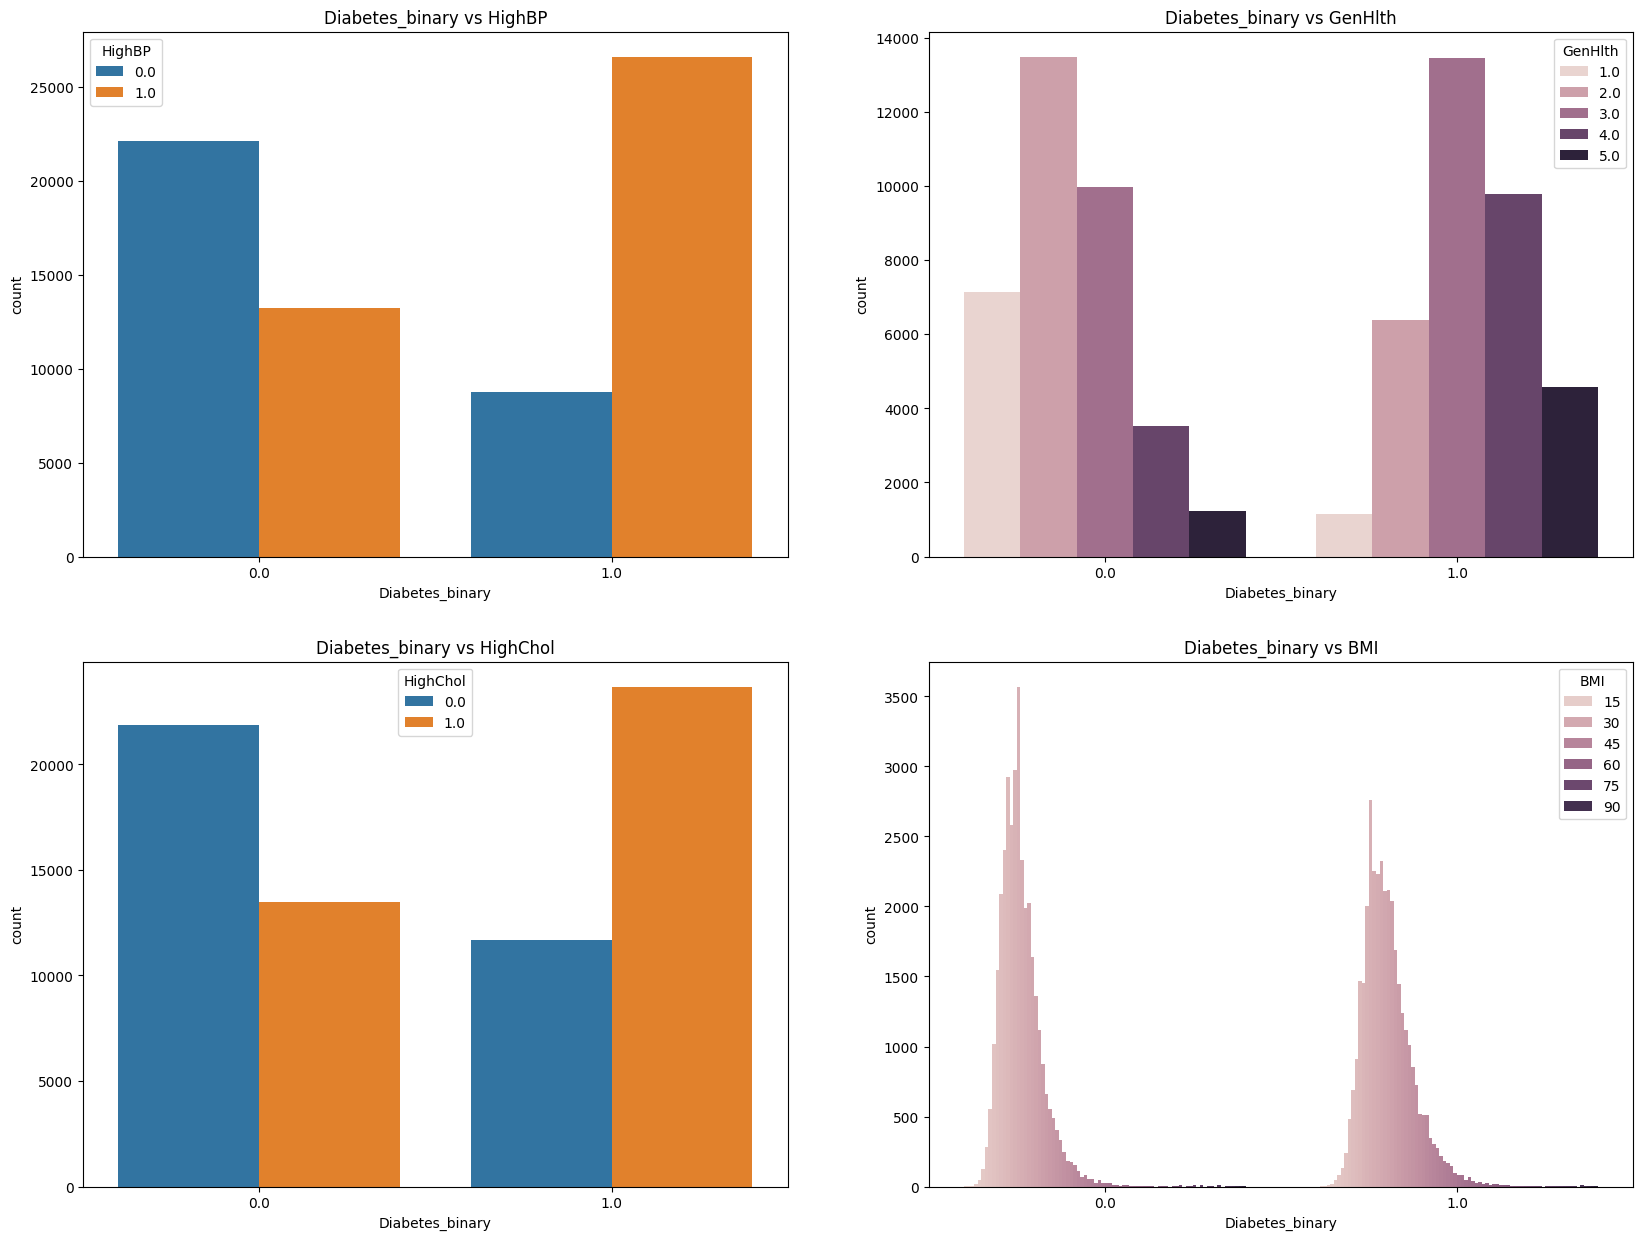

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(data=data, x="Diabetes_binary", hue='HighBP', ax=axes[0, 0])
axes[0, 0].set_title("Diabetes_binary vs HighBP")

sns.countplot(data=data, x="Diabetes_binary", hue='GenHlth', ax=axes[0, 1])
axes[0, 1].set_title("Diabetes_binary vs GenHlth")

sns.countplot(data=data, x="Diabetes_binary", hue='HighChol', ax=axes[1, 0])
axes[1, 0].set_title("Diabetes_binary vs HighChol")

sns.countplot(data=data, x="Diabetes_binary", hue='BMI', ax=axes[1, 1])
axes[1, 1].set_title("Diabetes_binary vs BMI")

11. Посмотрим выбросы

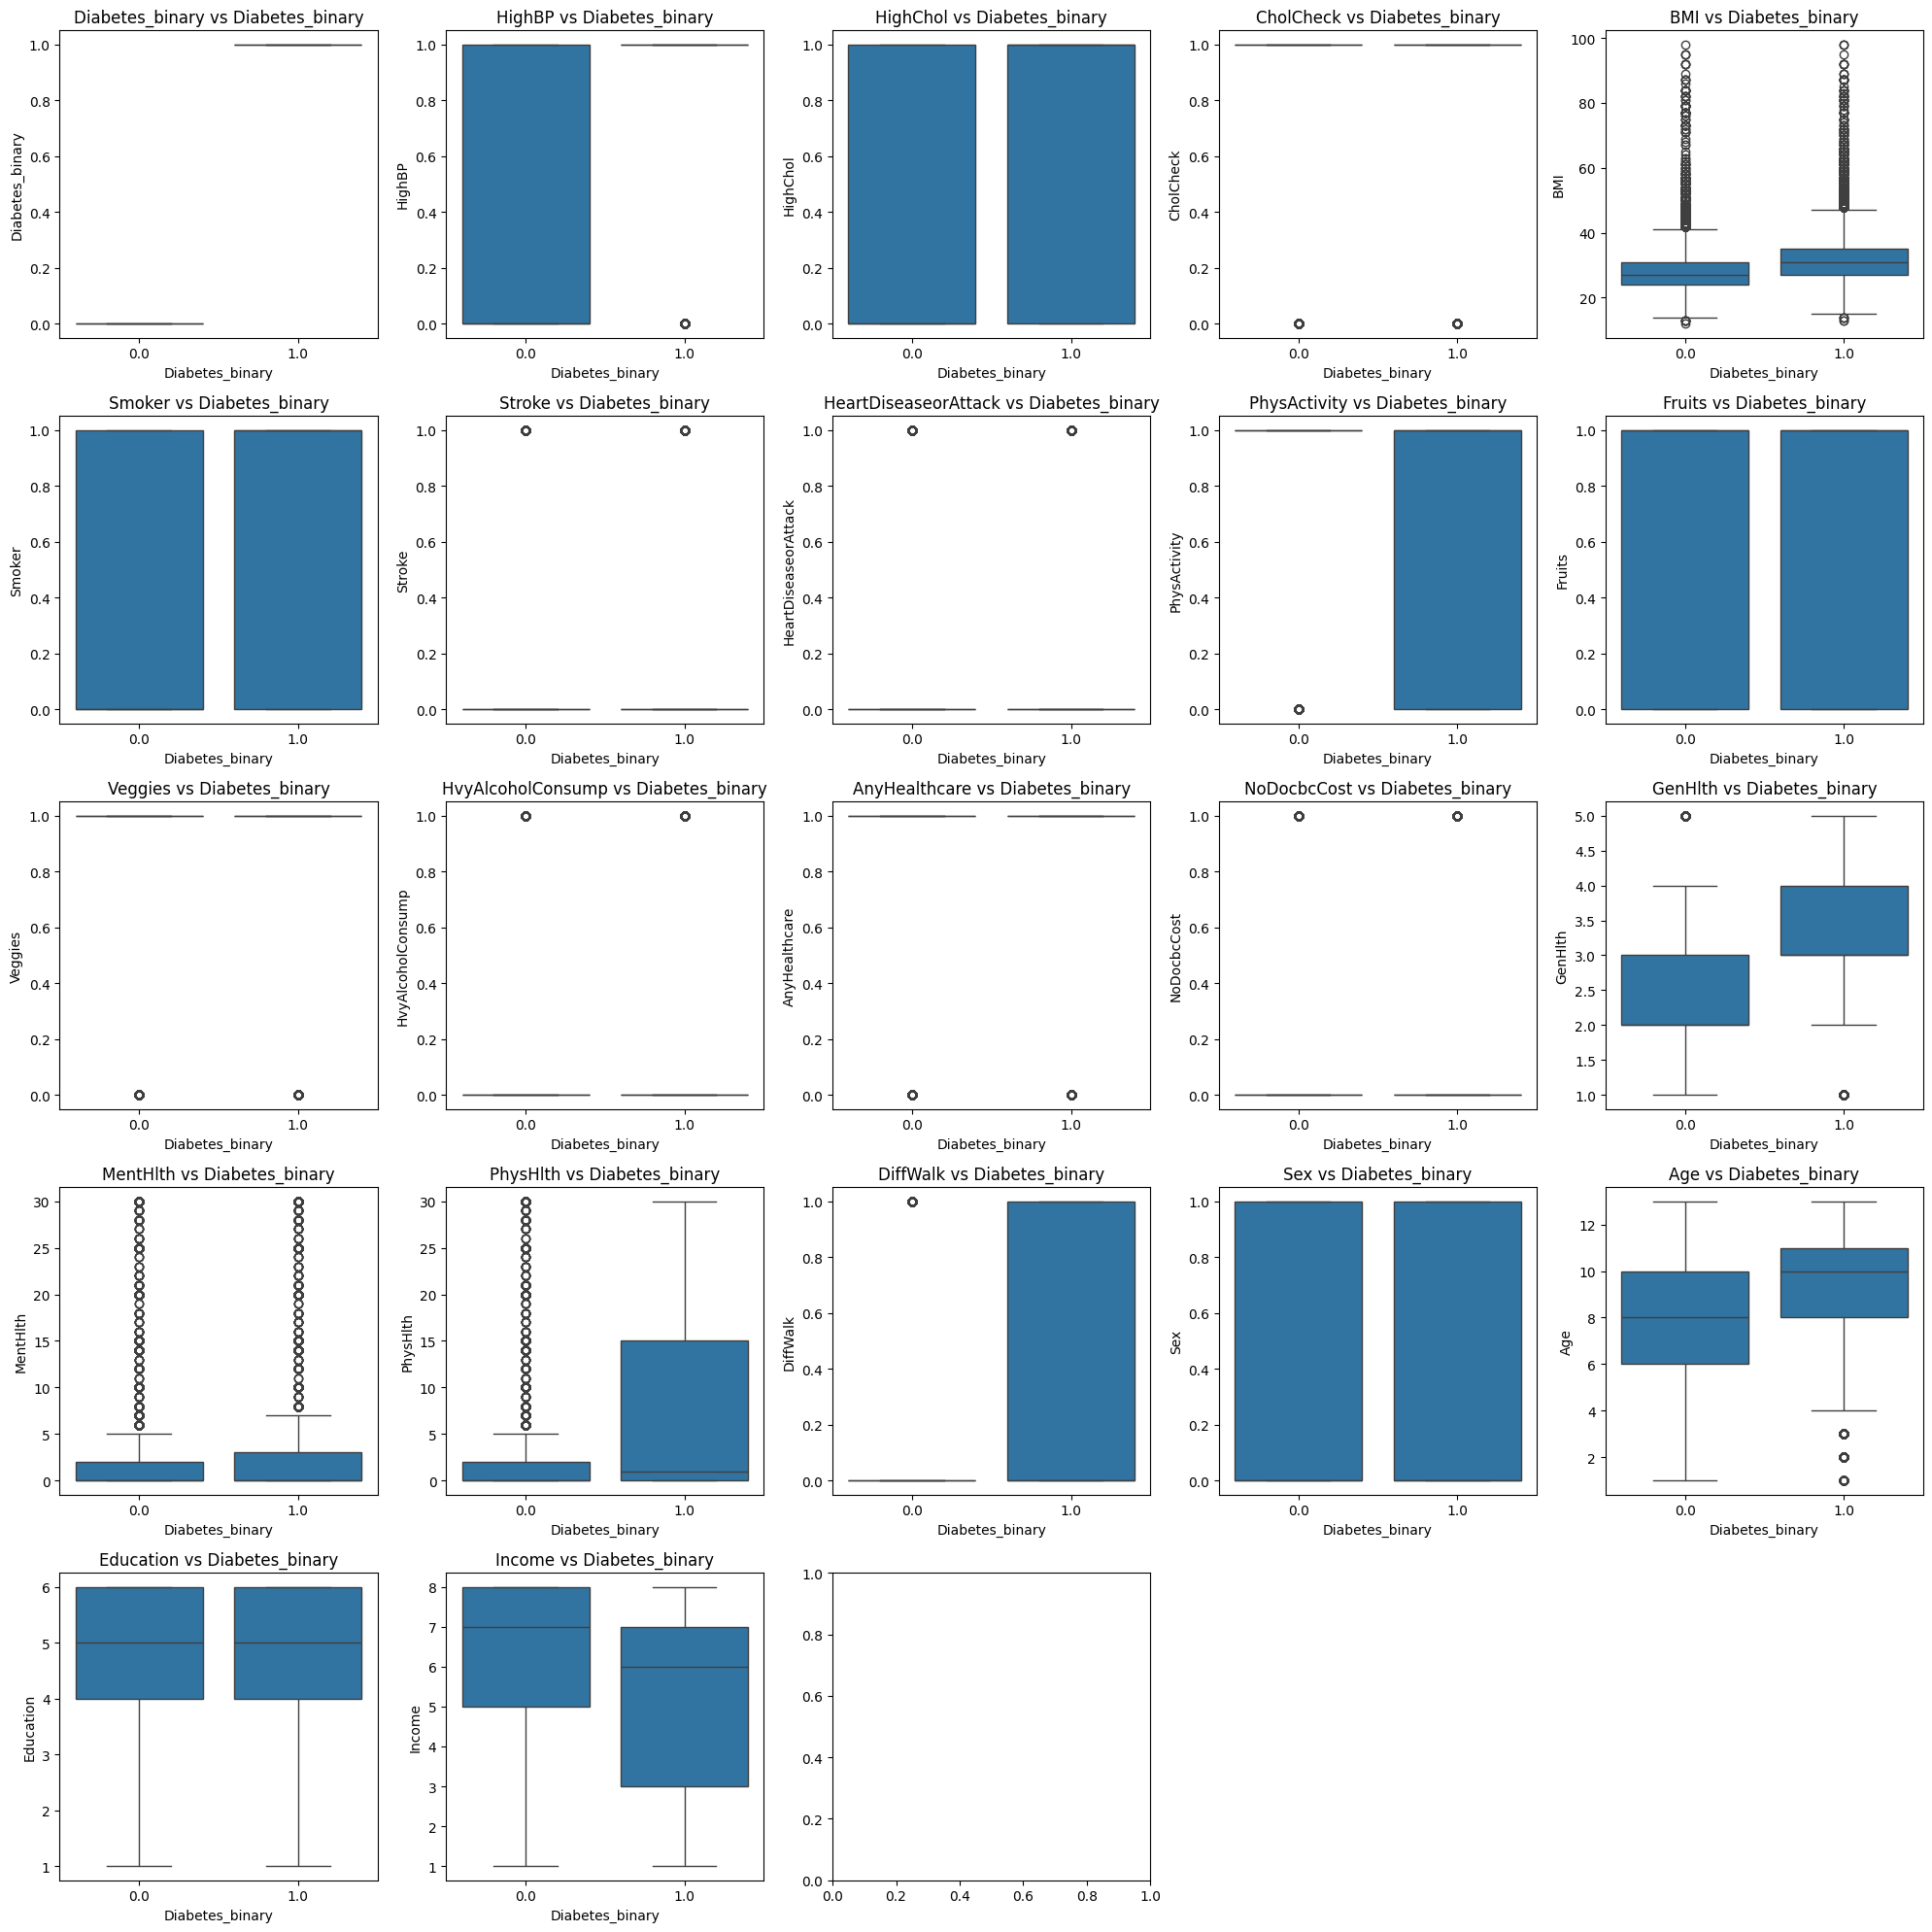

In [ ]:
num_cols = 5
num_rows = (len(data.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()
i=0
for column in data.columns:
    sns.boxplot(x='Diabetes_binary', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'{column} vs Diabetes_binary')
    i += 1

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

11.1 Удалим выбросы

In [ ]:
def replace_outliers_iqr(df, col, multiplier = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in data.columns:
    data = replace_outliers_iqr(data, 'BMI', multiplier=1.5)
    data = replace_outliers_iqr(data, 'MentHlth', multiplier=1.5)
    data = replace_outliers_iqr(data, 'PhysHlth', multiplier=1.5)

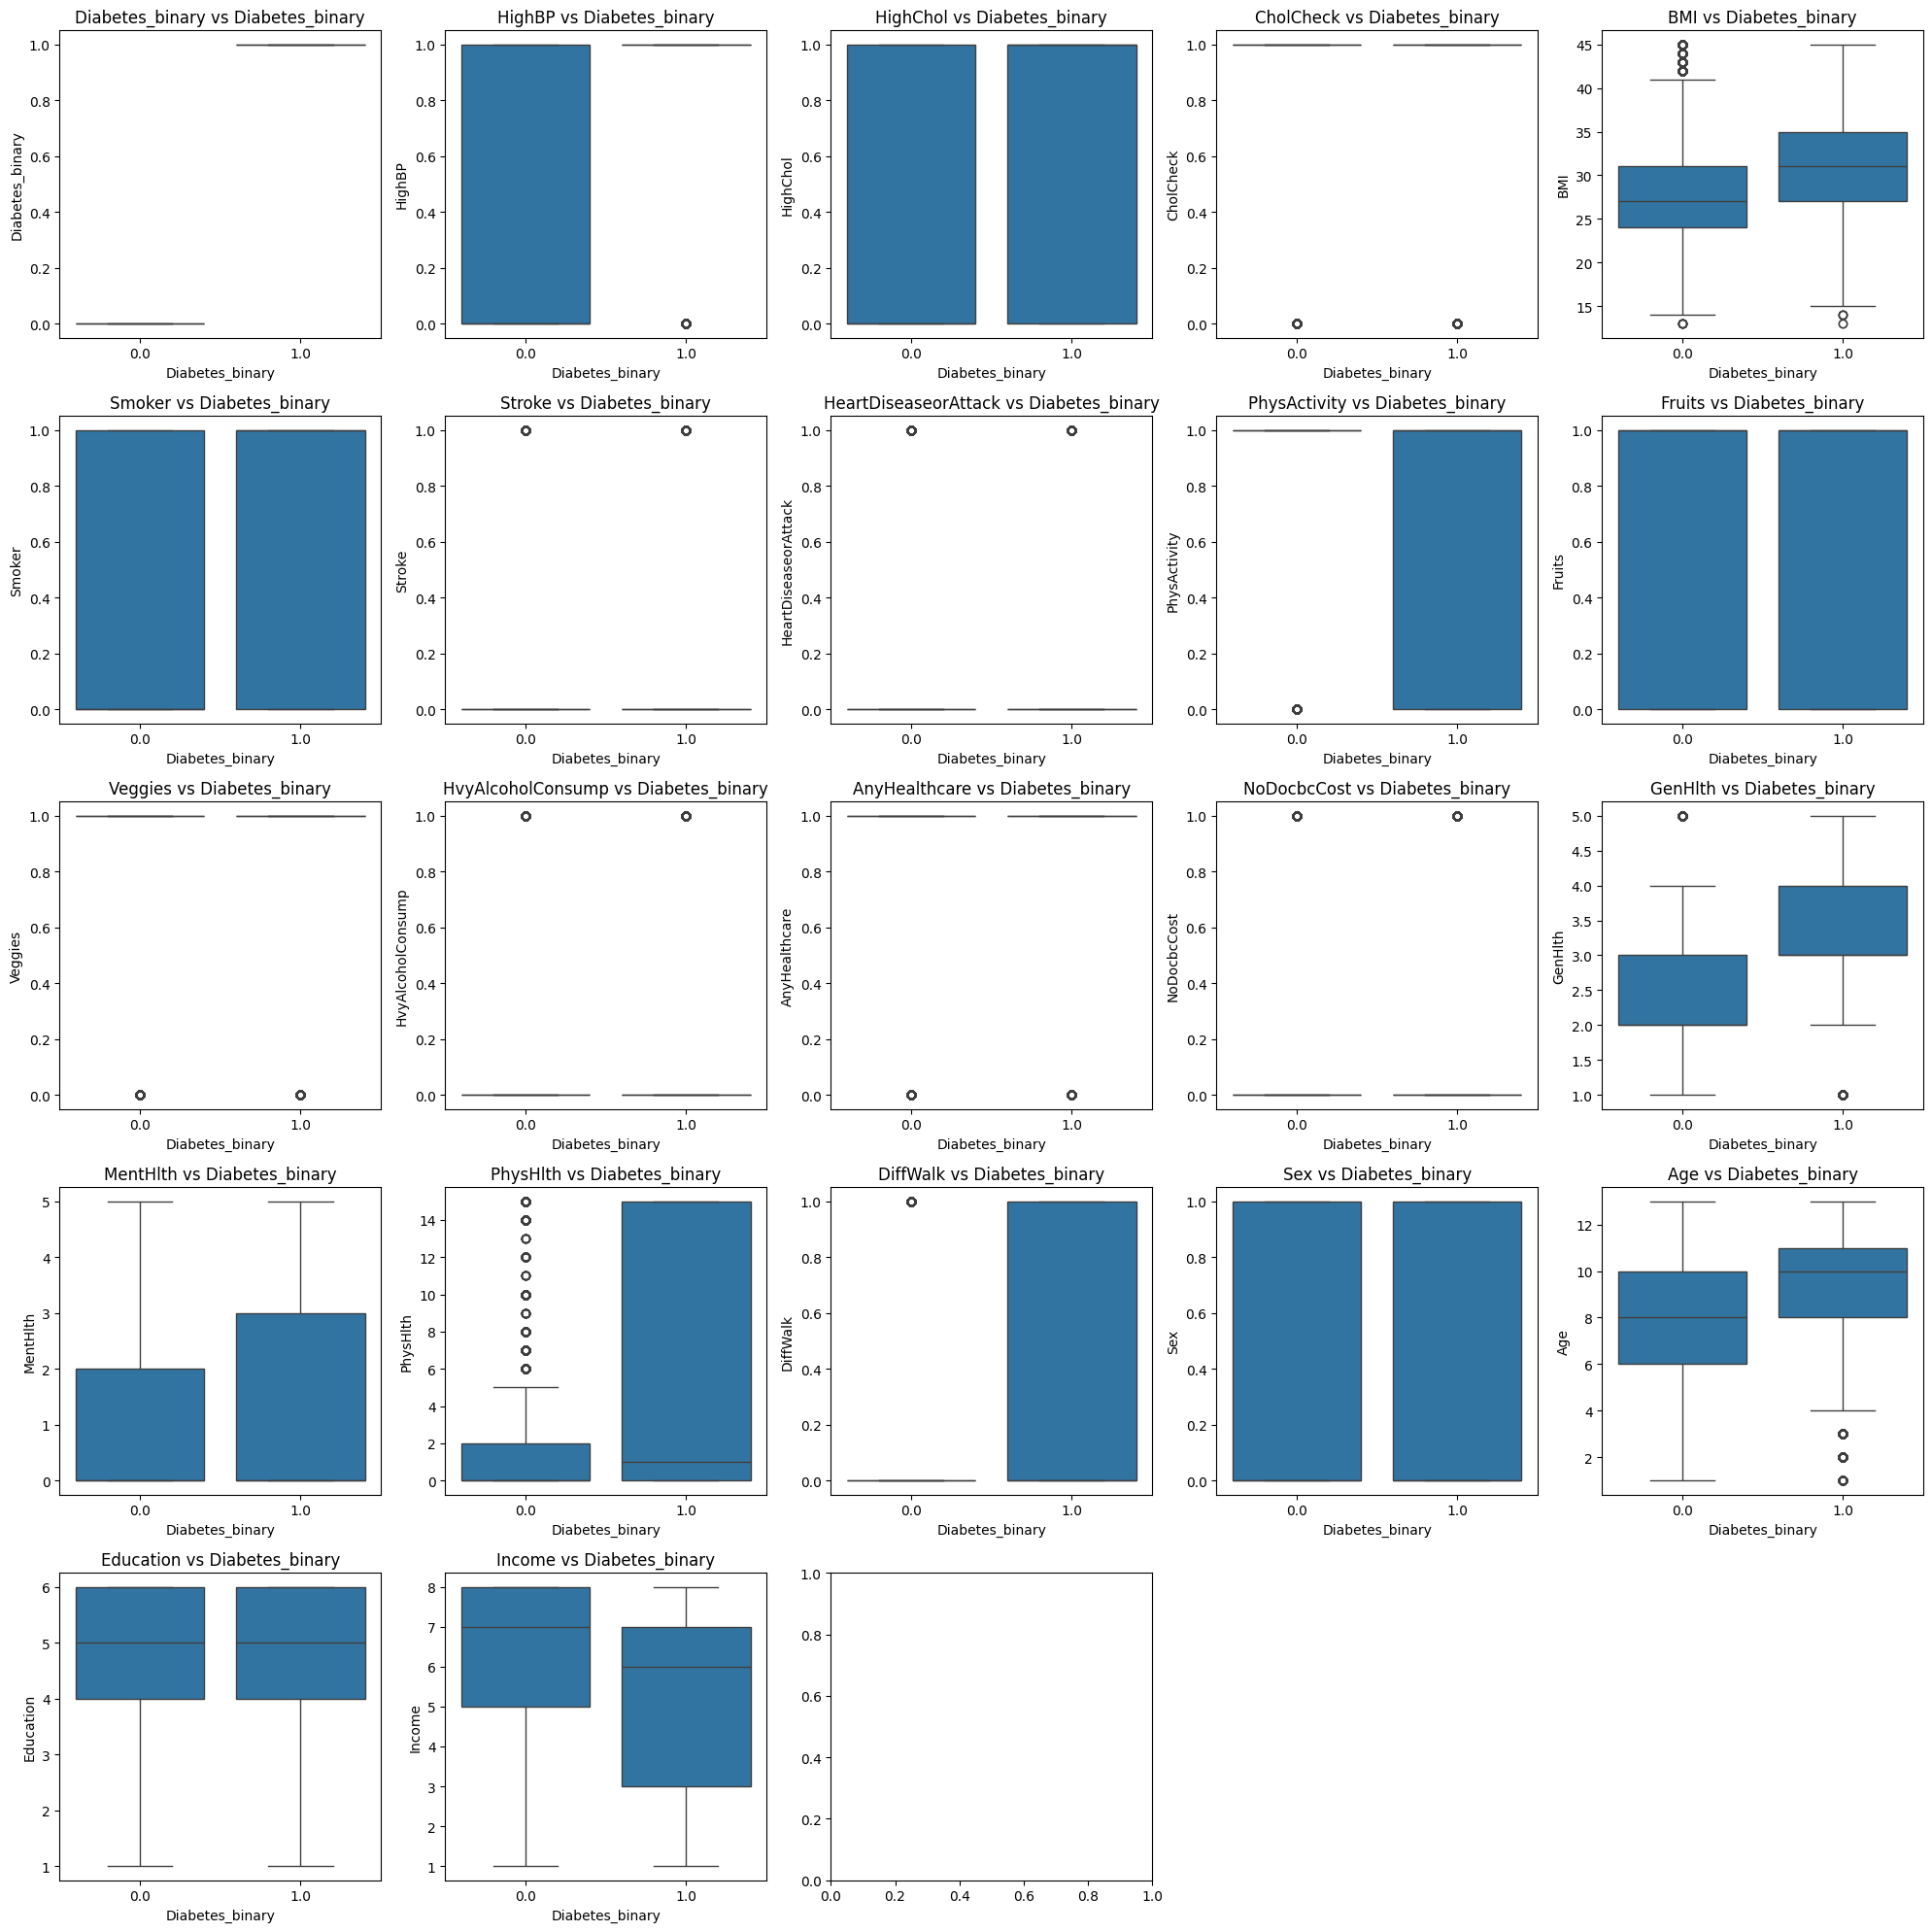

In [ ]:
num_cols = 5
num_rows = (len(data.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()
i=0
for column in data.columns:
    sns.boxplot(x='Diabetes_binary', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'{column} vs Diabetes_binary')
    i += 1

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Обучение модели**

12. Таргет бинарные - кодировать не нужно
13. Удаляем таргет из исходного датасета

In [ ]:
y = data.pop('Diabetes_binary')
df = data

14. Масштабируем данные, используя StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

15. Поделим данные на обучающую и тестовую выборки в соотнощении 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, y, test_size=0.3, random_state=17, stratify=y
)

16. Применяем следующие алгоритмы:

Logistic Regression (логистическая регрессия)


Random Forest (случайный лес)


Support Vector Machine (машина опорных векторов, SVM)


K-Nearest Neighbors (k ближайших соседей, KNN)


Gradient Boosting (градиентный бустинг)

**Логистическая регрессия**

In [ ]:
logistic_model = LogisticRegression() #Инифиализация модели
logistic_params = {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]} #Параметры для GridSearchCV
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring="accuracy", n_jobs=-1) #Использование GridSearchCV
logistic_grid.fit(X_train, y_train)
best_logistic = logistic_grid.best_estimator_ #Обучаем модель с лучшими параметрами
y_pred_logistic = best_logistic.predict(X_test) #Предскзываем на тесте

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_logistic, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.73      0.74     10604
     class 1       0.74      0.77      0.75     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
print("Logistic Regression Metrics:")
print(f"Best Parameters: {logistic_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logistic):.4f}")

Logistic Regression Metrics:
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7471
Precision: 0.7379
Recall: 0.7664
F1 Score: 0.7519


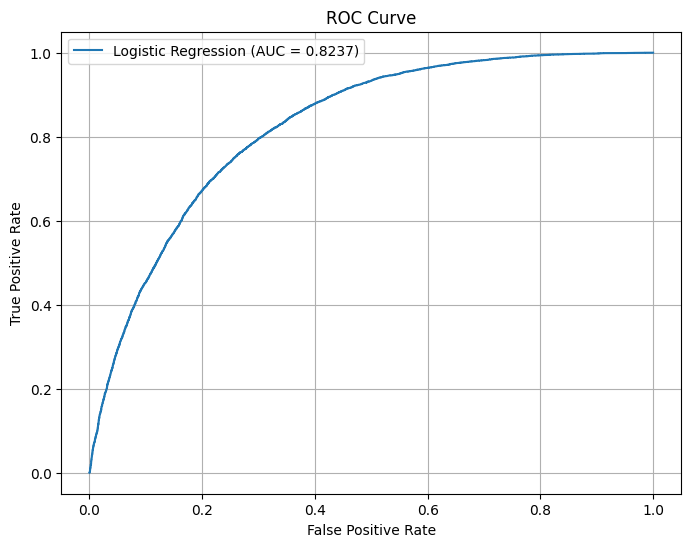

In [ ]:
if hasattr(best_logistic, "predict_proba"):
    y_proba_logistic = best_logistic.predict_proba(X_test)[:, 1]
else:
    y_proba_logistic = best_logistic.decision_function(X_test)


fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_proba_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.4f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

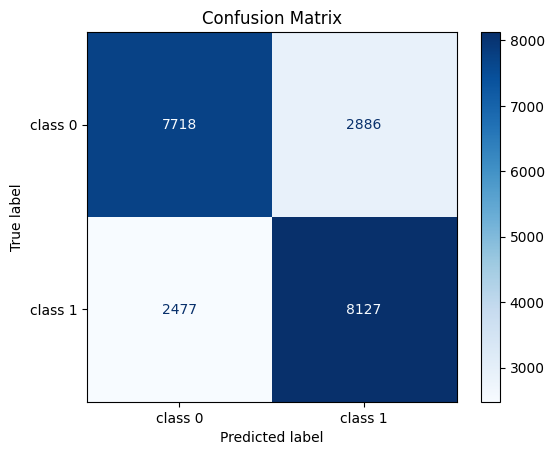

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Случайный лес**

In [ ]:
rf_model = RandomForestClassifier()
rf_params = {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.70      0.74     10604
     class 1       0.73      0.79      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
print("Random Forest Metrics:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

Random Forest Metrics:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7476
Precision: 0.7270
Recall: 0.7931
F1 Score: 0.7586


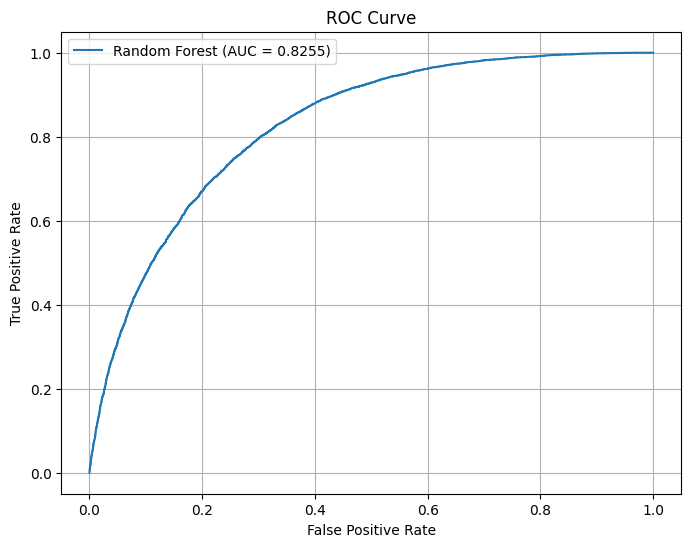

In [ ]:
if hasattr(best_rf, "predict_proba"):
    y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
else:
    y_proba_rf = best_rf.decision_function(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

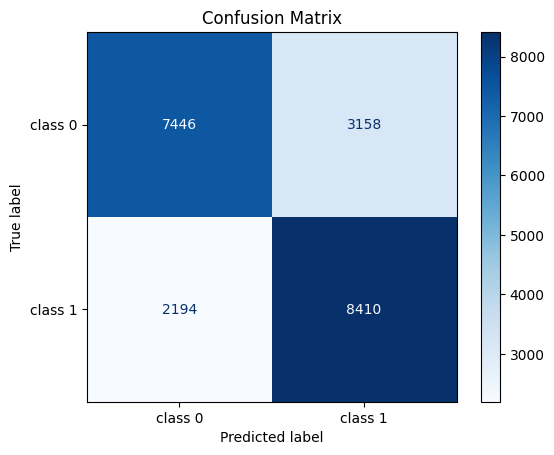

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Метод опорных векторов**

In [ ]:
svm_model = SVC()
svm_params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.79      0.69      0.73     10604
     class 1       0.72      0.81      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
print("SVM Metrics:")
print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")

SVM Metrics:
Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
Accuracy: 0.7492
Precision: 0.7214
Recall: 0.8121
F1 Score: 0.7640


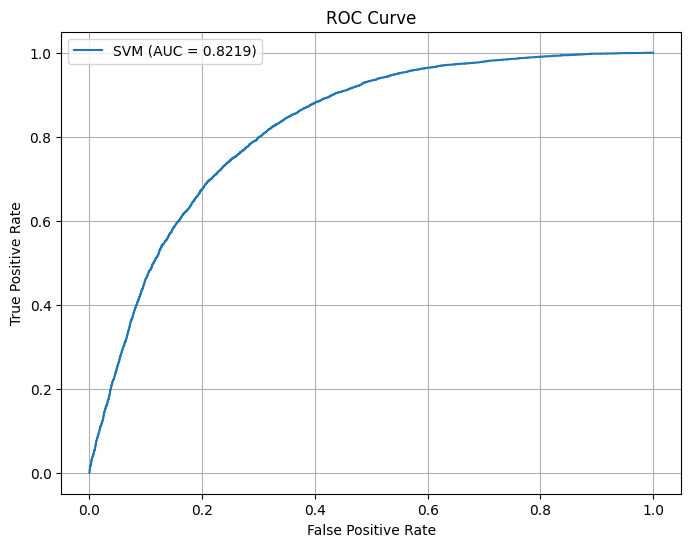

In [ ]:
if hasattr(best_svm, "predict_proba"):
    y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
else:
    y_proba_svm = best_svm.decision_function(X_test)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

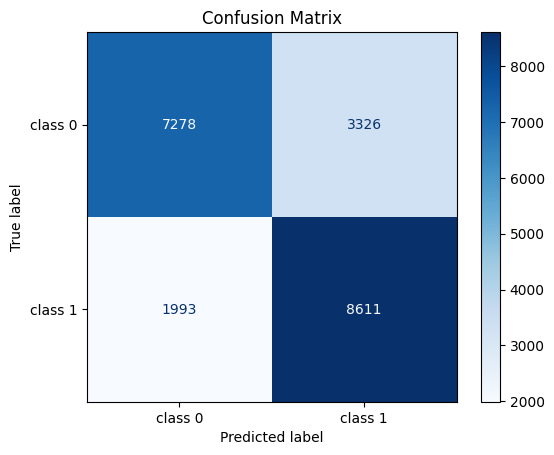

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**K-ближайших соседей**

In [ ]:
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring="accuracy", n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.69      0.71     10604
     class 1       0.71      0.75      0.73     10604

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



In [ ]:
print("KNN Metrics:")
print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

KNN Metrics:
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.7200
Precision: 0.7076
Recall: 0.7497
F1 Score: 0.7281


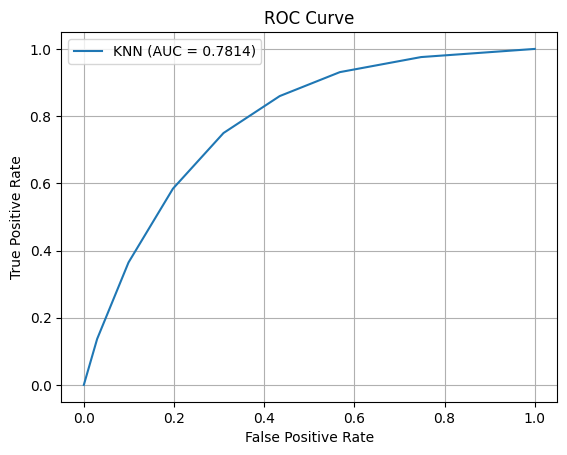

In [ ]:
if hasattr(best_knn, "predict_proba"):
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
else:
    y_proba_knn = best_knn.decision_function(X_test)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

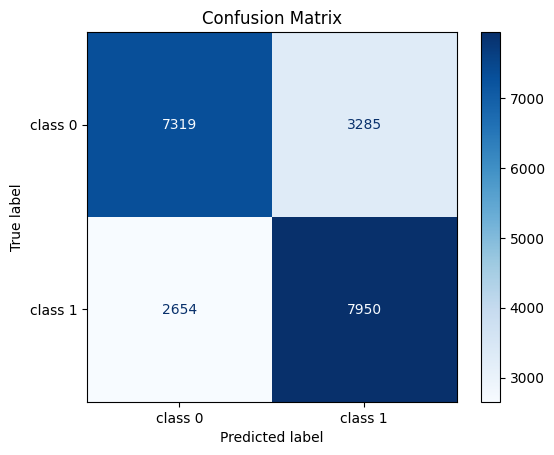

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Градиентный бустинг**

In [ ]:
gb_model = GradientBoostingClassifier()
gb_params = {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring="accuracy", n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_gb, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.70      0.74     10604
     class 1       0.73      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
print("Gradient Boosting Metrics:")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb):.4f}")

Gradient Boosting Metrics:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.7502
Precision: 0.7286
Recall: 0.7975
F1 Score: 0.7615


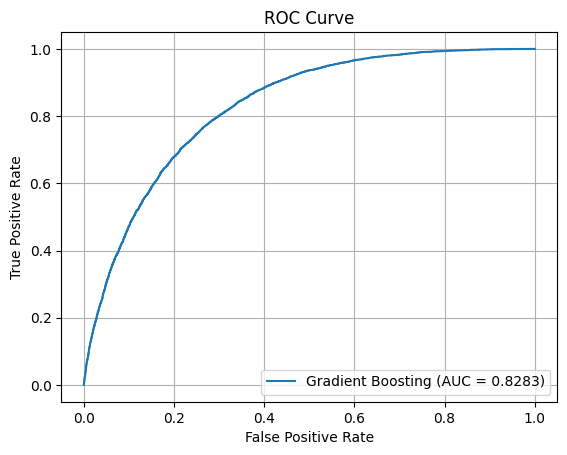

In [ ]:
if hasattr(best_gb, "predict_proba"):
    y_proba_gb = best_gb.predict_proba(X_test)[:, 1]
else:
    y_proba_gb = best_gb.decision_function(X_test)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

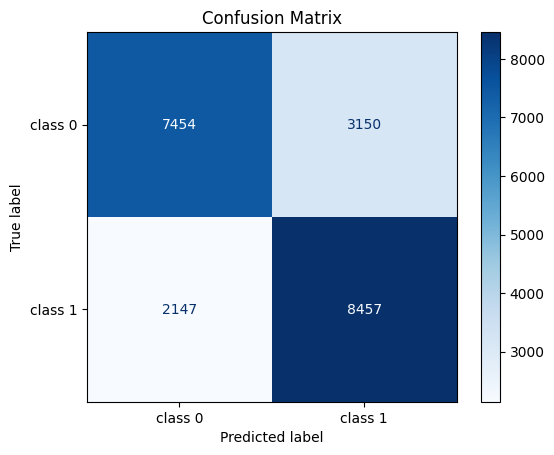

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()